# Metadata

```yaml
Course:    DS 5001
Module:    09 Lab
Topic:     FastText
Author:    R.C. Alvarado
Date:      28 March 2023
```

**Purpose:** We create word embeddings with novel data using word2vec and visualize results with tSNE.

# Set Up

In [9]:
data_in = '../data/novels'
data_out = '../data/novels'
data_prefix = 'novels'

In [5]:
OHCO = ['book', 'chapter', 'para_num', 'sent_num', 'token_num']
PARA = OHCO[:4] # Paragraphs
SENT = OHCO[:5] # Sentences

In [6]:
BAG = PARA

In [7]:
import pandas as pd
import numpy as np
from gensim.models import FastText
from sklearn.manifold import TSNE
import plotly_express as px

# Import Gensim Corpus

In [10]:
DOCS = pd.read_csv(f'{data_in}/novels-GENSIM_DOCS.csv', header=None)[0].to_list()

In [14]:
VOCAB = pd.read_csv(f'{data_in}/novels-VOCAB.csv')

In [15]:
V = VOCAB[VOCAB.pos_max.str.match(r'^(NN[^P]|VB)')].sort_values('tfidf_max', ascending=False).head(1000)\
    .term_str.to_list()

# Generate word embeddings with Gensim's FastText

In [16]:
# FastText?

In [17]:
model = FastText(sentences=DOCS)

# Visualize with tSNE

## Generate coordinates to plot

In [18]:
coords = pd.DataFrame(index=range(1000))
coords['label'] = V
coords['vector'] = coords['label'].apply(lambda x: model.wv[x])

In [19]:
coords.head()

label                                             vector
0     guides  [-0.0015094569, -0.0014069626, 0.00077895704, ...
1  donations  [0.0007798648, -0.00050445384, -3.0623694e-05,...
2      works  [8.765071e-05, -0.0010986227, 0.0011741201, 0....
3  cratchits  [-0.00061139435, 0.0013432469, -0.0010389704, ...
4       pips  [0.004343744, 0.00029701128, 0.0008883734, -0....

## Use ScikitLearn's TSNE library

In [20]:
tsne_engine = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
tsne_model = tsne_engine.fit_transform(coords['vector'].tolist())

/Users/rca2t1/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/rca2t1/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [21]:
coords['x'] = tsne_model[:,0]
coords['y'] = tsne_model[:,1]

In [22]:
coords.head()

label                                             vector          x  \
0     guides  [-0.0015094569, -0.0014069626, 0.00077895704, ...  15.908065   
1  donations  [0.0007798648, -0.00050445384, -3.0623694e-05,...   3.246412   
2      works  [8.765071e-05, -0.0010986227, 0.0011741201, 0....   4.241611   
3  cratchits  [-0.00061139435, 0.0013432469, -0.0010389704, ...  -4.634530   
4       pips  [0.004343744, 0.00029701128, 0.0008883734, -0....   6.874166   

           y  
0   4.329574  
1  -6.150486  
2  -4.747810  
3  -1.217741  
4 -16.001637

## Plot the coordinates

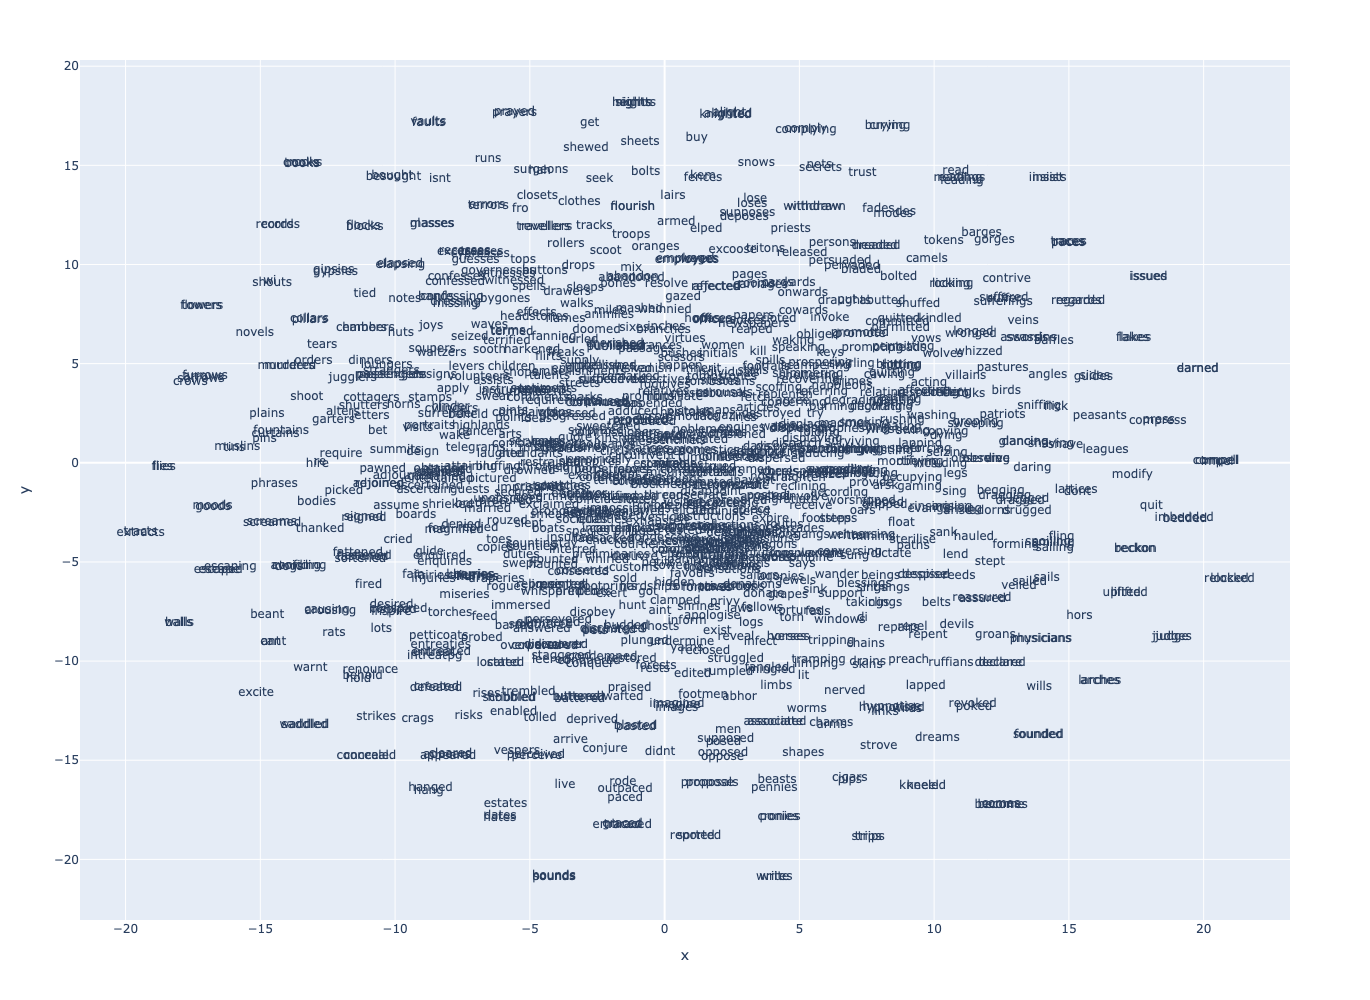

In [23]:
px.scatter(coords, 'x', 'y', text='label', height=1000).update_traces(mode='text')

# Semantic Algebra

## Analogies

$A : B :: C : D? \rightarrow B - A + C = D$


In [24]:
def complete_analogy(A, B, C, n=2):
    try:
        cols = ['term', 'sim']
        return pd.DataFrame(model.wv.most_similar(positive=[B, C], negative=[A])[:n], columns=cols)
    except KeyError as e:
        print('Error:', e)
        return None
    
def get_most_similar(positive, negative=None):
    return pd.DataFrame(model.wv.most_similar(positive, negative), columns=['term', 'sim'])

In [25]:
complete_analogy('man', 'boy', 'woman', 3)

term       sim
0    æ  0.141895
1    t  0.116483
2    e  0.082533

In [26]:
complete_analogy('girl', 'daughter', 'boy', 3)

term       sim
0    q  0.230626
1    g  0.219620
2    w  0.143295

In [27]:
complete_analogy('girl', 'sister', 'boy', 3)

term       sim
0    q  0.303455
1    d  0.243905
2    t  0.241948

In [28]:
complete_analogy('man', 'gentleman', 'woman', 5)

term       sim
0    æ  0.071702
1    e  0.053351
2    i  0.038423
3    p  0.037130
4    t  0.022659

In [29]:
complete_analogy('woman', 'lady', 'man', 5)

term       sim
0    v  0.179676
1    m  0.160621
2    â  0.159666
3    z  0.157661
4    ö  0.157205

In [30]:
complete_analogy('day', 'sun', 'night', 5)

term       sim
0    u  0.329168
1    e  0.188017
2    è  0.140207
3    â  0.118661
4    à  0.115619

## Similarites

In [31]:
get_most_similar('joy')

term       sim
0    p  0.200325
1    c  0.181891
2    f  0.165556
3    â  0.136493
4    v  0.127911
5    x  0.126062
6    s  0.106196
7    ô  0.103464
8    d  0.102738
9    w  0.095959

In [32]:
get_most_similar('man')

term       sim
0    k  0.175545
1    h  0.151002
2    o  0.148407
3    f  0.107983
4    [  0.104052
5    q  0.093817
6    s  0.091813
7    a  0.088121
8    y  0.082049
9    g  0.079399

In [33]:
get_most_similar(['woman','girl'], ['man'])

term       sim
0    e  0.184911
1    æ  0.154177
2    r  0.106785
3    x  0.055995
4    y  0.043053
5    i  0.030713
6    p  0.027070
7    ô  0.016304
8    a  0.010156
9    é  0.005075

In [34]:
get_most_similar(positive=['man'], negative=['woman'])

term       sim
0    k  0.223951
1    o  0.202994
2    h  0.179946
3    f  0.177833
4    m  0.175260
5    â  0.153746
6    z  0.137688
7    [  0.134596
8    ,  0.132834
9    ö  0.129357

In [35]:
get_most_similar(positive=['woman'], negative=['girl'])

term       sim
0    q  0.075670
1    y  0.047197
2    à  0.023397
3    c  0.022546
4    ô  0.019146
5    j  0.006668
6    s -0.001257
7    t -0.007901
8    g -0.009781
9    d -0.022968

In [36]:
get_most_similar(positive='woman')

term       sim
0    e  0.118485
1    y  0.109202
2    s  0.012907
3    æ  0.012595
4    c  0.006432
5    ô  0.003896
6    j -0.003665
7    p -0.018191
8    t -0.018866
9    n -0.023236

In [37]:
get_most_similar('woman')

term       sim
0    e  0.118485
1    y  0.109202
2    s  0.012907
3    æ  0.012595
4    c  0.006432
5    ô  0.003896
6    j -0.003665
7    p -0.018191
8    t -0.018866
9    n -0.023236

In [38]:
get_most_similar(['woman'],['marriage'])

term       sim
0    t  0.129735
1    e  0.119505
2    s  0.118860
3    k  0.105998
4    n  0.063869
5    [  0.061910
6    p  0.061215
7    j  0.058395
8    c  0.049748
9       0.030749

In [39]:
get_most_similar(['woman'],['lady'])

term       sim
0    y  0.134945
1    e  0.122754
2    i  0.114970
3    c  0.091859
4    s  0.033937
5    u  0.026046
6    p  0.024570
7    [  0.014697
8    t  0.003845
9    x -0.004496

In [40]:
get_most_similar(['man'],['gentleman'])

term       sim
0    y  0.175613
1    f  0.157579
2    h  0.134571
3    o  0.128863
4    q  0.128854
5    g  0.123197
6    k  0.112518
7    â  0.083391
8    è  0.080266
9    w  0.068027

# Save

In [41]:
FT = pd.DataFrame(model.wv.vectors_norm, index=model.wv.vocab.keys())
FT.to_csv('{}/{}-FastText.csv'.format(data_out, data_prefix))
pd.Series(DOCS).to_csv('{}/{}-GENSIM_DOCS.csv'.format(data_out, data_prefix), index=False, header=False)